<a href="https://colab.research.google.com/github/PauloVictorFS/fastaiOnCampus/blob/main/lesson03_211043718_PauloVictorFS_Paulo_Victor_Fonseca_Sousa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Diferenciar entre Pandas
Aluno: Paulo Victor Fonseca Sousa

Matricula:211043718

Github:PauloVictorFS

##Introdução

O projeto a  seguir   tem como objetivo explorar o aprendizado de máquina aplicado à classificação de imagens. A tarefa principal será treinar um modelo de aprendizado profundo capaz de distinguir entre pandas e suas subespecies Esse projeto foi organizado conforme   as diretrizes específicas apresentadas pelo  que serão definidas a seguir:
## Critérios do projeto:
- Propósito: O projeto tem como propósito principal a criação de um modelo de aprendizado de máquina para diferenciar entre pandas e suas duas subespecies (panda qinling e panda vermelho). O objetivo é aplicar técnicas de aprendizado profundo para resolver essa tarefa.

- Tema Abordado na Lição: O projeto está alinhado com os conceitos e técnicas apresentados na lição do Fastai relacionada ao aprendizado profundo e classificação de imagens.

- Dado Coerente com o Tema: Os dados utilizados para treinar e testar o modelo são imagens de pandas marrons, pandas vermelhos e pandas normais.

- Caracterização do Dado: Os dados são coletados da web usando a API do DuckDuckGo e passam por um processo de verificação manual de qualidade antes de serem usados para treinamento do modelo. O fluxo de aquisição e pré-processamento dos dados será detalhado.

- Organização: O projeto é organizado em células de código que executam tarefas específicas, desde a aquisição de dados até a criação, treinamento e avaliação do modelo. Isso proporciona uma estrutura clara para compreender o fluxo de trabalho. Cada célula será explicada de forma detalhada

- Jupyter: O projeto é elaborado usando um ambiente Jupyter Notebook, o que permite documentar as etapas do projeto e executar código interativamente.


## Passo 1 - Configurando o Ambiente
Nesta parte é instalado dois pacotes Python, "duckduckgo_search" e "fastai", usando o comando pip install. Esses pacotes são necessários para as tarefas subsequentes no projeto. Também  é realizado a importação de funções do pacote "duckduckgo_search" e definido uma função chamada search_images. Essa função permite buscar e coletar URLs de imagens relacionadas a um termo específico usando a API do DuckDuckGo.

In [ ]:
!pip install -Uqq duckduckgo_search
!pip install -Uqq fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=500): return L(ddg_images(term, max_results=max_images)).itemgot('image')

## Passo 2 - Verificando o funcionamento da Função
 Nestas células, são realizados os downloads de uma única imagem de um "panda vermelho" um "panda qinling" e um "panda gigante" usando a função download_url e exibido essas imagens em miniatura. Isso é realizado para garantir que a função está funcionando conforme o esperado

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


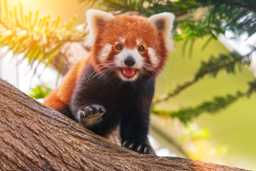

In [ ]:
from fastai.vision.all import *
from fastdownload import download_url

download_url(search_images('Red panda', max_images=1)[0], 'Red_panda.jpg', show_progress=True)
Image.open('Red_panda.jpg').to_thumb(256,256)

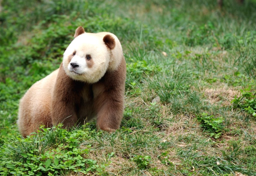

In [ ]:
download_url(search_images('Qinling Panda', max_images=1)[0], 'Qinling_Panda.jpg', show_progress=False)
Image.open('Qinling_Panda.jpg').to_thumb(256,256)

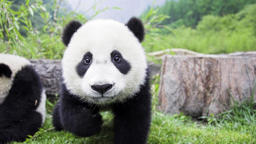

In [ ]:
download_url(search_images('Normal Panda', max_images=1)[0], 'Normal_Panda.jpg', show_progress=False)
Image.open('Normal_Panda.jpg').to_thumb(256,256)

### Passo 3 - Baixando e verificando  as imagens
Nesta célula, respectivamente, é definido uma lista de termos de busca através do 'searches' ("Red panda", "Qinling Panda"  e "Normal panda") e um caminho de destino("path") para armazenar as imagens baixadas. Em seguida, é executado um loop para cada termo de busca, criando uma pasta para cada um, fazendo o download de imagens relacionadas a esses termos, aguardando entre cada pesquisa e redimensionando as imagens para um tamanho máximo de 400 pixels. Além disso é verificado a qualidade das imagens baixadas. A função verify_images é usada para verificar se as imagens são válidas e exclui aquelas que não atendem aos critérios de qualidade.

In [35]:
from pathlib import Path
from fastai.vision import *

searches = {'Red Panda': 'Red Panda', 'Giant Panda': 'Giant Panda', 'Brown Panda': 'Qinling Panda'}
path = Path('Tipos De Panda')

for search, folder_name in searches.items():
    dest = (path/folder_name)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{search} photo', 100))
    resize_images(path/folder_name, max_size=400, dest=path/folder_name)


In [34]:
import shutil

# Define o caminho do diretório a ser excluído
directory_to_delete = '/content/ Diff Types of Panda'

# Use shutil.rmtree para excluir o diretório e seu conteúdo
shutil.rmtree(directory_to_delete)

# Confirme que o diretório foi excluído
print(f"O diretório '{directory_to_delete}' foi excluído.")


O diretório '/content/ Diff Types of Panda' foi excluído.


In [36]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

12

## Passo 3 - Treinando o Modelo
Nesta célula, é definido um bloco de dados (DataBlock) para organizar os dados de imagem. Isso envolve a definição de blocos de entrada (imagem) e saída (categoria), bem como as transformações de dados e a divisão dos dados em conjuntos de treinamento e validação.

Além disso, é  exibido um lote de imagens dos conjuntos de dados de treinamento e validação usando a função show_batch. Isso ajuda a entender como os dados estão organizados e visualmente inspecionar as imagens.

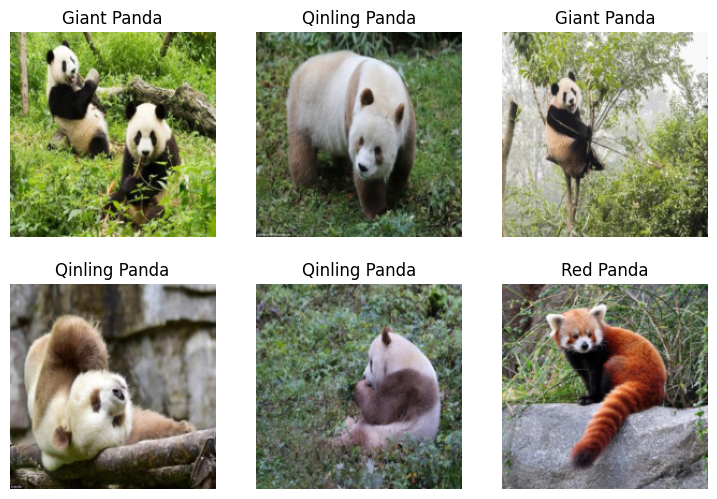

In [41]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

Após isso, é criado um modelo de aprendizado de máquina para classificar imagens de Pandas. Primeiro, foi utilizado a função vision_learner para criar um objeto "learn" que inclui um modelo de rede neural convolucional  baseado na arquitetura "resnet18". Esse modelo pré-treinado é uma forma de transferência de aprendizado, onde aproveitamos o conhecimento prévio do modelo sobre uma ampla variedade de imagens antes de ajustá-lo especificamente para nosso problema de classificação de emoções.

In [39]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.429942,0.323993,0.083333,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.475438,0.250488,0.020833,00:38
1,0.272940,0.268582,0.020833,00:38
2,0.185244,0.262970,0.020833,00:38


Aqui foi testado outro modelo de resnet, a resnet 34, que é uma rede mais profunda em comparação com a ResNet-18, por possui 34 camadas convolucionais, que a principio facilita em tarefas mais complexas, por isso foi testado para medir a precisão dos 2 modelos, e foi escolhido o melhor entre eles para ser utilizado

In [42]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.071518,0.491767,0.166667,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.565271,0.241292,0.020833,01:09
1,0.335335,0.247477,0.041667,01:09
2,0.225627,0.288432,0.041667,01:09
3,0.171125,0.300065,0.041667,01:10
4,0.140629,0.302153,0.041667,01:11


## Passo 4 - Analisando o modelo
Primeiramente é gerado a matriz de confusão, que mostra onde o modelo erra, e em seguida é mostrado  os maiores erros do nosso modelo



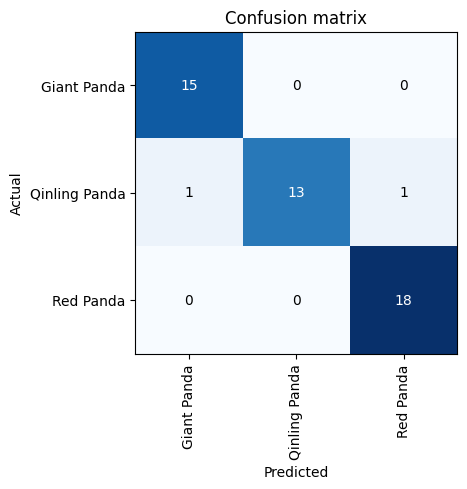

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

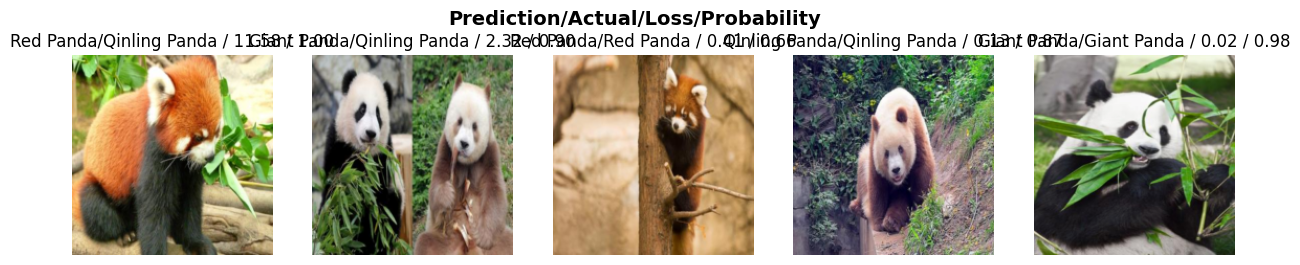

In [44]:
interp.plot_top_losses(5, nrows=1)

Nesta célula, é utilizado o modelo de aprendizado de máquina treinado anteriormente (resnet18) para fazer uma previsão sobre uma imagem de uma "Panda normal" (imagem 'Normal_Panda.jpg'), de um "Qinling Panda"(imagem 'Qinling_Panda.jpg') e  de um  "Red Panda"(imagem 'Red_Panda.jpg'.) A probabilidade da imagem ser um desses é exibida.

In [45]:
is_giant,_,probs = learn.predict(PILImage.create('Normal_Panda.jpg'))
print(f" Provavelmente é um :{is_giant}.")
print(f"Probabilidade de Ser um Panda Gigante: {probs[0]:.4f}")

 Provavelmente é um :Giant Panda.
Probabilidade de Ser um Panda Gigante: 1.0000


In [46]:
is_giant,_,probs = learn.predict(PILImage.create('Qinling_Panda.jpg'))
print(f" Provavelmente é um :{is_giant}.")
print(f"Probabilidade de Ser um Panda Qinling: {probs[1]:.4f}")

 Provavelmente é um :Qinling Panda.
Probabilidade de Ser um Panda Qinling: 1.0000


In [47]:
is_giant,_,probs = learn.predict(PILImage.create('Red_panda.jpg'))
print(f" Provavelmente é um : {is_giant}.")
print(f"Probabilidade de ser um Panda Vermelho: {probs[2]:.4f}")

 Provavelmente é um : Red Panda.
Probabilidade de ser um Panda Vermelho: 1.0000


## Passo 5 - Fazendo Deploy do Modelo
Com o modelo treinado e testado localmente, é exportado o modelo para ser usado no hugging Face




In [48]:
learn.export('model.pkl')

Com tudo configurado no Hugging Face o modelo fica disponível no seguinte link:
https://huggingface.co/spaces/Srpaulo122/Panda_Classifier

Conclusão:
De modo geral foi possível realizar um classificador de pandas com um loss pequeno e o deploy no hugging face, gerando um resultado satisfatório
